In [1]:
import seaborn as snb
import pandas as pd
import matplotlib.pyplot as plt

# Read DATASET 

In [2]:
df = pd.read_csv('dataset_diabetes_diabetic_data.csv')
df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabatic
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,No,No
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,Ch,Yes
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,Yes
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,Ch,Yes
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,Ch,Yes


# Dataset Analysis

In [3]:
df.isnull().sum()

patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
change                      0
diabatic                    0
dtype: int64

In [4]:
for col in df.columns:
    print(col,":",df[col].nunique())

patient_nbr : 52500
race : 6
gender : 3
age : 10
admission_type_id : 8
discharge_disposition_id : 26
admission_source_id : 13
time_in_hospital : 14
num_lab_procedures : 116
num_procedures : 7
num_medications : 74
number_outpatient : 29
number_emergency : 19
number_inpatient : 21
diag_1 : 685
diag_2 : 702
diag_3 : 727
number_diagnoses : 16
change : 2
diabatic : 2


In [5]:
df.drop('patient_nbr',axis='columns',inplace=True)
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabatic
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,No,No
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,Ch,Yes
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,Yes
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,Ch,Yes
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,Ch,Yes


In [6]:
df[df['diag_1']=='?']['diag_1'].count()

19

In [7]:

df[df['diag_2']=='?']['diag_2'].count()

304

In [8]:
df[df['diag_3']=='?']['diag_3'].count()

1237

In [9]:
for i in df.columns:
    if (df[df[i]=='?'][i].count())>0:
        print(i,":",df[df[i]=='?'][i].count())

race : 1461
diag_1 : 19
diag_2 : 304
diag_3 : 1237


In [10]:
count=0
for i,row in df.iterrows():
    if(row['race']=='?')&(row['diag_1']=='?')&(row['diag_2']=='?')&(row['diag_3']=='?'):
        count+=1
print(count)

0


# Data Filtering

In [13]:
df.drop(['diag_1','diag_2','diag_3'],axis='columns',inplace=True)
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabatic
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,1,No,No
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,Ch,Yes
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,No,Yes
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,Ch,Yes
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,Ch,Yes


In [14]:
df.shape[0]

70180

In [15]:
df.drop_duplicates(keep = "first",inplace = True)

In [16]:

df.shape[0]

70158

# Seperating Numerical data and Catagoorical data

In [17]:
df_cat = pd.DataFrame()
df_num = pd.DataFrame()

In [18]:
for i in df.columns:
    if df[i].dtype == object:
        df_cat[i] = df[i]
    else:
        df_num[i] = df[i]

In [19]:
df_cat.head()

,race,gender,age,change,diabatic
0,Caucasian,Female,[0-10),No,No
1,Caucasian,Female,[10-20),Ch,Yes
2,AfricanAmerican,Female,[20-30),No,Yes
3,Caucasian,Male,[30-40),Ch,Yes
4,Caucasian,Male,[40-50),Ch,Yes


In [20]:
df_num.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,6,25,1,1,41,0,1,0,0,0,1
1,1,1,7,3,59,0,18,0,0,0,9
2,1,1,7,2,11,5,13,2,0,1,6
3,1,1,7,2,44,1,16,0,0,0,7
4,1,1,7,1,51,0,8,0,0,0,5


# Removing Null Value

In [21]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [22]:
for i in df_cat.columns:
    df[i] = lr.fit_transform(df[i])
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabatic
0,3,0,0,6,25,1,1,41,0,1,0,0,0,1,1,0
1,3,0,1,1,1,7,3,59,0,18,0,0,0,9,0,1
2,1,0,2,1,1,7,2,11,5,13,2,0,1,6,1,1
3,3,1,3,1,1,7,2,44,1,16,0,0,0,7,0,1
4,3,1,4,1,1,7,1,51,0,8,0,0,0,5,0,1


# Training and Testing

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
inputs = df.drop('diabatic',axis='columns')
target = df.diabatic

In [26]:
xtrain,xtest,ytrain,ytest = train_test_split(inputs,target,test_size=0.3,random_state=10)

# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [28]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [40]:
ypred = grid_search_cv.predict(xtest)

In [41]:
model.score(xtest,ytest)

0.7119441277080958

# GridSearch Cross-Validation using decision tree 

In [42]:
import numpy as np

In [43]:
parameter = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 10)}

In [44]:
from sklearn.model_selection import GridSearchCV
grid_search_cv = GridSearchCV(model, parameter,cv=3)

In [45]:
grid_search_cv.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9])})

In [46]:
grid_search_cv.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [47]:
grid_search_cv.score(xtest,ytest)

0.7401178259217027

In [48]:
score = grid_search_cv.cv_results_
score['mean_test_score']

array([0.72620648, 0.73282427, 0.73380167, 0.73722256, 0.73819996,
       0.73699857, 0.74021584, 0.72620648, 0.73282427, 0.73359805,
       0.7365506 , 0.73929953, 0.73738546, 0.74029729])

<AxesSubplot:>

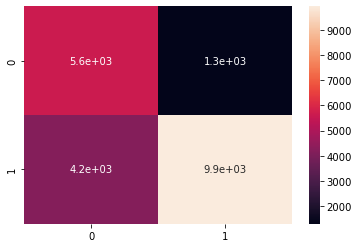

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(ytest,ypred)
snb.heatmap(cm,annot=True)

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfs = RandomForestClassifier(max_depth=2)

In [51]:
rfs.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=2)

In [52]:
ypred = rfs.predict(xtest)

In [53]:
rfs.score(xtest,ytest)

0.6705625237552262

In [54]:
accuracy_score(ypred,ytest)

0.6705625237552262

In [55]:
cm = confusion_matrix(ytest,ypred)

In [57]:
import seaborn as sns

<AxesSubplot:>

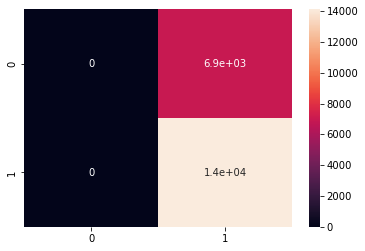

In [58]:
sns.heatmap(cm,annot=True)

# AUC and ROC Curve


# Auc-Roc Curve in Decision Tree

In [59]:
probs = grid_search_cv.predict_proba(xtest)
probs = probs[:,1]
probs

array([0.41147541, 0.48888889, 1.        , ..., 0.51913478, 0.51913478,
       1.        ])

In [60]:
from sklearn.metrics import roc_curve,roc_auc_score

In [61]:
ind_prob = [0 for i in range(len(ytest))]
ns_auc = roc_auc_score(ytest, ind_prob)
lr_auc = roc_auc_score(ytest, probs)

In [62]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.831


In [63]:
ns_fpr, ns_tpr, _ = roc_curve(ytest, ind_prob)
lr_fpr, lr_tpr, _ = roc_curve(ytest, probs)

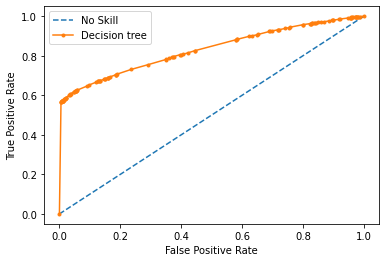

In [64]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Auc-Roc Curve in Random Forest

In [65]:
probs = rfs.predict_proba(xtest)
probs = probs[:,1]
probs

array([0.62405229, 0.62973361, 0.72953451, ..., 0.62117895, 0.62090353,
       0.77461933])

In [66]:
ind_prob = [0 for i in range(len(ytest))]
ns_auc = roc_auc_score(ytest, ind_prob)
lr_auc = roc_auc_score(ytest, probs)

In [67]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.821


In [68]:
ns_fpr, ns_tpr, _ = roc_curve(ytest, ind_prob)
lr_fpr, lr_tpr, _ = roc_curve(ytest, probs)

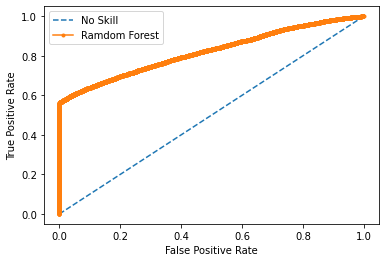

In [69]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Ramdom Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()